In [1]:
import tensorflow as tf

tf.random.set_seed(0)

n_input = 1
n_hidden = 20
n_output = 1

In [2]:
model = tf.keras.models.Sequential()
model.add(
    tf.keras.layers.Dense(n_hidden, input_shape=(n_input, ),
                          activation='tanh'))
model.add(tf.keras.layers.Dense(n_output, activation='linear'))

optimizer = tf.optimizers.Adam(learning_rate=0.1)

2022-03-05 05:37:23.802320: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-05 05:37:23.803063: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [3]:
@tf.function
def step(x):    
    with tf.GradientTape() as tape:
        y = model(x)
        dy_dx = tf.gradients(y, x)[0]
        residual = dy_dx - y
        boundary = y[0] - 1
        loss = (residual)**2 + (boundary)**2
        loss = tf.reduce_mean(loss)
    
    weights = model.trainable_weights
    grads = tape.gradient(loss, weights)
    optimizer.apply_gradients(zip(grads, weights))

    return loss

In [4]:
x = tf.linspace(0.0, 1.0, 100)
X = tf.reshape(x, (-1, 1))

losses = []
for i in range(200):
    loss = step(X).numpy()
    losses.append(loss)
    if i % 10 == 0:
        print("{:03d} : {:08.6f}".format(i, sum(losses[-10:]) / 10))

000 : 0.105334
010 : 0.457629
020 : 0.282903
030 : 0.224039
040 : 0.109269
050 : 0.012887
060 : 0.004354
070 : 0.001374
080 : 0.000967
090 : 0.000448
100 : 0.022668
110 : 0.007530
120 : 0.003184
130 : 0.001112
140 : 0.000420
150 : 0.000203
160 : 0.000106
170 : 0.000061
180 : 0.000049
190 : 0.000039


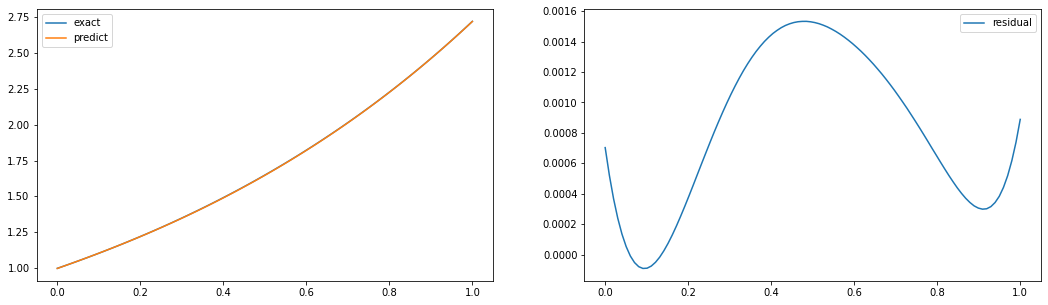

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(18, 5))

domain = x.numpy()
exact = tf.exp(domain).numpy()
predict = model(X).numpy().flatten()

axs[0].plot(domain, exact, label='exact')
axs[0].plot(domain, predict, label='predict')
axs[0].legend()

axs[1].plot(domain, exact - predict, label='residual')
axs[1].legend()
fig.savefig('residual.jpg', bbox_inches='tight')

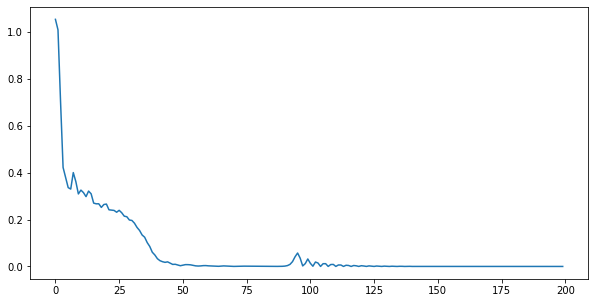

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.savefig('loss.jpg', bbox_inches='tight')